In [1]:
import pandas as pd
import matplotlib.pyplot as plots
import numpy as np
import scipy.stats as s
import seaborn as sns
# district vs race
# race vs time in pd

In [2]:
officer_df = pd.read_csv("../all_data/data/unified_data/profiles/officer-profiles.csv.gz", compression = 'gzip')
officer_df

/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
0,100001,A,BRODERSON,F,NaN,NaN,1926.0,WHITE,MALE,1950-06-03,1980-03-10,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,2863.0
1,100002,A,DALESSANDRO,A,NaN,NaN,1923.0,WHITE,MALE,1956-09-01,1979-10-18,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,6100.0
2,100003,A,KIBURAS,J,NaN,NaN,1948.0,WHITE,MALE,1968-06-24,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,14560.0
3,100004,A,KUSTRA,J,NaN,NaN,1923.0,WHITE,MALE,1953-09-28,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,15445.0
4,100005,A,MC LAUGHLIN,R,NaN,NaN,1941.0,BLACK,MALE,1966-06-20,1986-09-16,0.0,NaN,123.0,POLICE OFFICER,NaN,NaN,3,POLICE OFFICER,18373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33688,133689,NaN,NaN,L,NaN,NaN,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,1,NaN,33699.0
33689,133690,NaN,NaN,NaN,NaN,NaN,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0,NaN,NaN,NaN,1,NaN,33700.0
33690,133691,NaN,NaN,L,NaN,NaN,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,1,NaN,33701.0
33691,133692,NaN,NaN,P,NaN,NaN,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,1,NaN,33702.0


In [3]:
# Data Cleaning - Removing unnecessary columns and null values

cleaned_cols = officer_df.loc[:, ["UID", "first_name", "last_name", "middle_initial", "race", "gender", "appointed_date", "resignation_date", "cleaned_rank"]]
officers_cleaned = cleaned_cols.loc[cleaned_cols.race.notnull() & cleaned_cols.appointed_date.notnull() & cleaned_cols.resignation_date.notnull() & cleaned_cols.last_name.notnull() & cleaned_cols.first_name.notnull()]
officers_cleaned


,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,cleaned_rank
0,100001,A,BRODERSON,F,WHITE,MALE,1950-06-03,1980-03-10,NaN
1,100002,A,DALESSANDRO,A,WHITE,MALE,1956-09-01,1979-10-18,NaN
2,100003,A,KIBURAS,J,WHITE,MALE,1968-06-24,1980-10-01,NaN
3,100004,A,KUSTRA,J,WHITE,MALE,1953-09-28,1980-10-01,NaN
4,100005,A,MC LAUGHLIN,R,BLACK,MALE,1966-06-20,1986-09-16,POLICE OFFICER
...,...,...,...,...,...,...,...,...,...
32513,132514,KEVIN,TAYLOR,NaN,BLACK,MALE,2007-11-01,2014-05-22,NaN
32514,132515,MERCEDES,WATSON,M,BLACK,FEMALE,2005-09-16,2011-01-21,NaN
32515,132516,DWIGHT,WHITE,A,BLACK,MALE,2007-11-01,2011-07-18,NaN
33055,133056,RONY,MAMMOO,D,WHITE,MALE,2017-11-16,2012-08-16,NaN


In [4]:
# df checking only Race and Gender are not null

profiles_df = officer_df.loc[(officer_df.race.notnull()) & (officer_df.gender.notnull())]
real_white_list = profiles_df[profiles_df.race == "WHITE"]
real_black_list = profiles_df.loc[profiles_df.race == "BLACK"].race.tolist()
real_hispanic_list = profiles_df.loc[profiles_df.race == "HISPANIC"].race.tolist()
real_other_list = profiles_df.loc[(profiles_df.race != "HISPANIC") & (profiles_df.race != "BLACK") & (profiles_df.race != "WHITE")].race.tolist()

real_male_list = profiles_df[profiles_df.gender == "MALE"]
real_female_list = profiles_df[profiles_df.gender == "FEMALE"]

profiles_df


,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
0,100001,A,BRODERSON,F,NaN,NaN,1926.0,WHITE,MALE,1950-06-03,1980-03-10,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,2863.0
1,100002,A,DALESSANDRO,A,NaN,NaN,1923.0,WHITE,MALE,1956-09-01,1979-10-18,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,6100.0
2,100003,A,KIBURAS,J,NaN,NaN,1948.0,WHITE,MALE,1968-06-24,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,14560.0
3,100004,A,KUSTRA,J,NaN,NaN,1923.0,WHITE,MALE,1953-09-28,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,15445.0
4,100005,A,MC LAUGHLIN,R,NaN,NaN,1941.0,BLACK,MALE,1966-06-20,1986-09-16,0.0,NaN,123.0,POLICE OFFICER,NaN,NaN,3,POLICE OFFICER,18373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33666,133667,ROBERT,OLSZANSKI,,NaN,NaN,NaN,WHITE,MALE,2017-05-16,NaN,NaN,10348.0,NaN,NaN,NaN,NaN,1,NaN,33677.0
33667,133668,DEBBIE,ROBERSON,L,NaN,NaN,1955.0,BLACK,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33678.0
33668,133669,JOHN,MACIEJEWSKI,A,NaN,NaN,1941.0,WHITE,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33679.0
33669,133670,ROBIN,BELL,L,NaN,NaN,1965.0,BLACK,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33680.0


In [5]:
# checking proportions of missing data for years served

w_p = len(white_list) / len(real_white_list)
b_p = len(black_list) / len(real_black_list)
h_p = len(hispanic_list) / len(real_hispanic_list)
o_p = len(other_list) / len(real_other_list)
both = (len(hispanic_list) + len(other_list)) / (len(real_hispanic_list) + len(real_other_list))

w_p, b_p, h_p, o_p, both

NameError: name 'white_list' is not defined

In [6]:
len(real_hispanic_list)

4579

In [7]:
def years_as_officer(row):
    
    # Function that takes in a row as an input, and outputs the total time an officer has been working
    
    appointed_date = row['appointed_date']
    resigned_date = row['resignation_date']
    
    appointed_year = int(appointed_date[:4])
    appointed_month = int(appointed_date[5:7])
    appointed_day = int(appointed_date[8:10])
    
    resigned_year = int(resigned_date[:4])
    resigned_month = int(resigned_date[5:7])
    resigned_day = int(resigned_date[8:10])
    
    years = resigned_year - appointed_year
    months = years * 12
    
    days = 0
    if appointed_day == resigned_day:
        days = 1
    else:
        days = float(resigned_day + (31 - appointed_day)) / 31
    
    month_diff = resigned_month - appointed_month
    
    if month_diff >= 0 :
        months = months + month_diff - 1 + days
    else:
        years = years - 1
        months = years * 12
        months = (12 + months + month_diff)
        months = months - 1 + days
    return round((float(months) / 12), 2)

In [8]:
officers_cleaned["years_served"] = officers_cleaned.apply(years_as_officer, axis = 1) # Applying function to df

/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
new_officers_cleaned = officers_cleaned.loc[officers_cleaned.years_served > 0] # Officers who served more than 0 days
new_officers_cleaned

,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,cleaned_rank,years_served
0,100001,A,BRODERSON,F,WHITE,MALE,1950-06-03,1980-03-10,NaN,29.77
1,100002,A,DALESSANDRO,A,WHITE,MALE,1956-09-01,1979-10-18,NaN,23.13
2,100003,A,KIBURAS,J,WHITE,MALE,1968-06-24,1980-10-01,NaN,12.27
3,100004,A,KUSTRA,J,WHITE,MALE,1953-09-28,1980-10-01,NaN,27.01
4,100005,A,MC LAUGHLIN,R,BLACK,MALE,1966-06-20,1986-09-16,POLICE OFFICER,20.24
...,...,...,...,...,...,...,...,...,...,...
32511,132512,CHRISTIAN,SHIU,K,ASIAN/PACIFIC ISLANDER,MALE,2007-11-01,2012-12-11,NaN,5.11
32512,132513,JAMES,STEWART,J,BLACK,MALE,2006-04-28,2010-02-27,NaN,3.83
32513,132514,KEVIN,TAYLOR,NaN,BLACK,MALE,2007-11-01,2014-05-22,NaN,6.56
32514,132515,MERCEDES,WATSON,M,BLACK,FEMALE,2005-09-16,2011-01-21,NaN,5.35


In [10]:
# Separating officers from race

black_officers = new_officers_cleaned.loc[new_officers_cleaned.race == "BLACK"]
white_officers = new_officers_cleaned.loc[new_officers_cleaned.race == "WHITE"]
hispanic_officers = new_officers_cleaned.loc[new_officers_cleaned.race == "HISPANIC"]
other_officers = new_officers_cleaned.loc[(new_officers_cleaned.race != "BLACK") & (new_officers_cleaned.race != "HISPANIC") & (new_officers_cleaned.race != "WHITE")]
not_white_black = new_officers_cleaned.loc[(new_officers_cleaned.race != "BLACK") & (new_officers_cleaned.race != "WHITE")]

black_list = black_officers.years_served.tolist()
white_list = white_officers.years_served.tolist()
hispanic_list = hispanic_officers.years_served.tolist()
other_list = other_officers.years_served.tolist()
n_wob = not_white_black.years_served.tolist()

black_series = pd.Series(black_list)
white_series = pd.Series(white_list)
hispanic_series = pd.Series(hispanic_list)
other_series = pd.Series(other_list)
nwob_series = pd.Series(n_wob)



In [11]:
years_served_list = new_officers_cleaned.years_served.tolist()
ys_df = pd.DataFrame(years_served_list)
sample_means = []
for i in range(10000):
    sample_means.append(ys_df.sample(5000)[0].mean())

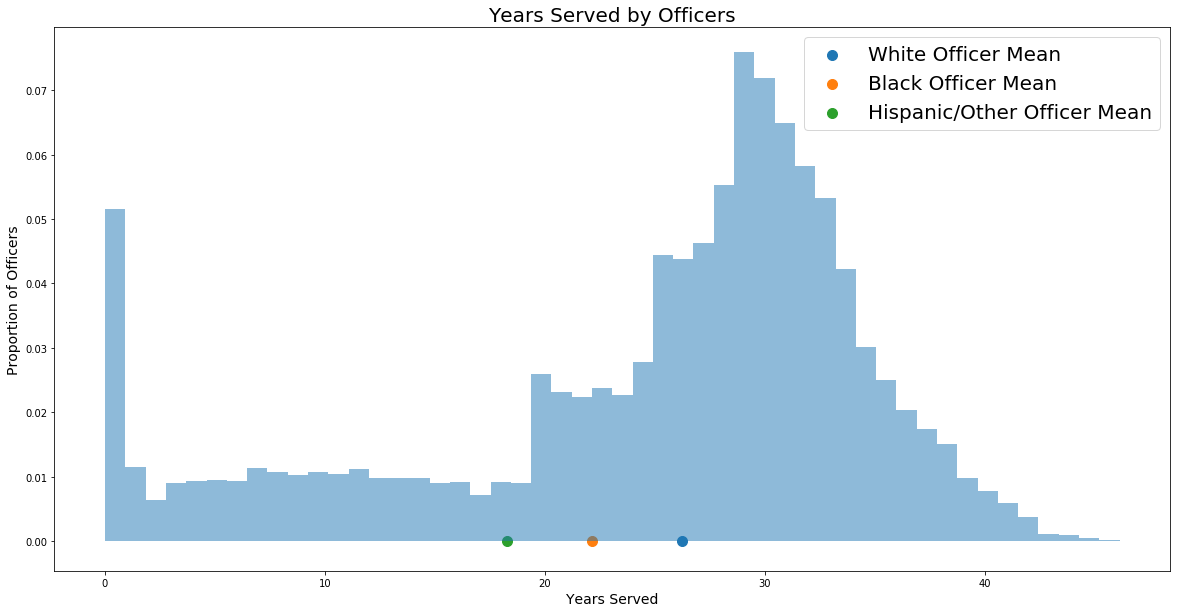

In [12]:
# race sig test

plots.figure(figsize=(20, 10))
plots.hist(years_served_list, density = True, alpha = .5, color = 'tab:blue', bins = 50)
plots.title("Years Served by Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Proportion of Officers", size = 14)
plots.scatter(np.mean(white_list), 0, color='tab:blue', s=100, label = "White Officer Mean")
plots.scatter(np.mean(black_list), 0, color='tab:orange', s=100, label = "Black Officer Mean")
plots.scatter(np.mean(n_wob), 0, color='tab:green', s=100, label = "Hispanic/Other Officer Mean")
plots.legend(loc = "upper right", prop={'size': 20})
plots.show()

In [13]:
s.ks_2samp(black_list, black_list)

Ks_2sampResult(statistic=0.0, pvalue=1.0)

In [14]:
total_series = pd.Series(new_officers_cleaned.years_served.tolist())
print('\033[1m' + "Officer Summary Statistics:" + "\033[0;0m")
total_series.describe()

Officer Summary Statistics:


count    20075.000000
mean        24.704415
std         10.400110
min          0.010000
25%         20.305000
50%         28.050000
75%         31.680000
max         46.120000
dtype: float64

Black Officer Statistics:
count    4779.000000
mean       22.144884
std        10.394190
min         0.010000
25%        16.000000
50%        25.160000
75%        29.775000
max        43.500000
dtype: float64


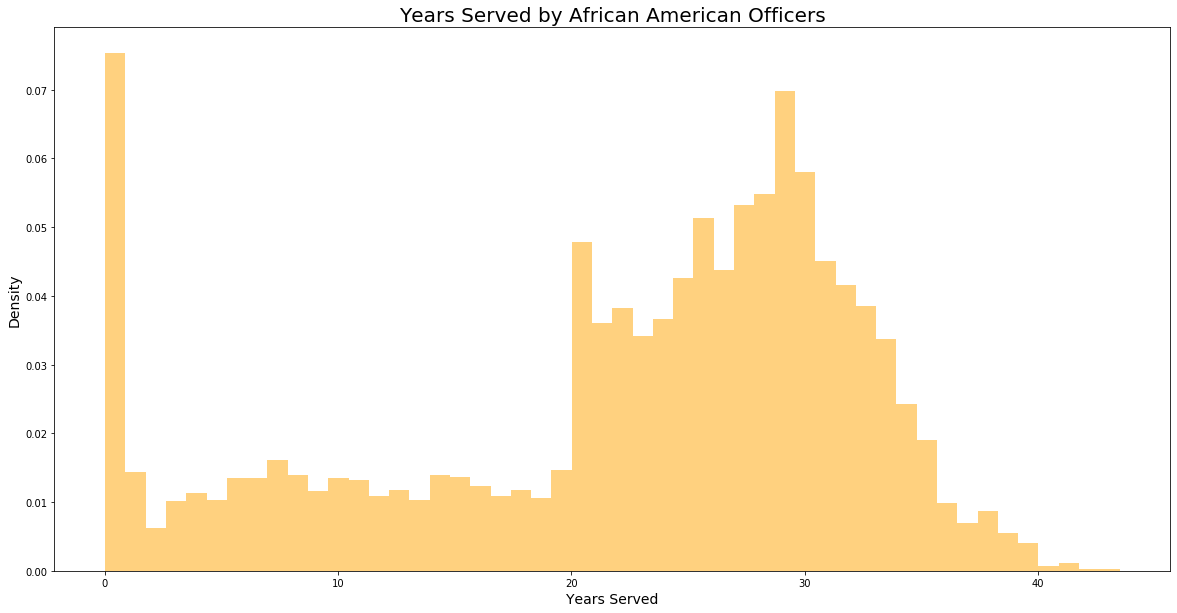

In [15]:
# Histogram of years served by African American officers

print('\033[1m' + "Black Officer Statistics:" + "\033[0;0m")
print(black_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(black_list, density = True, alpha = .5, color = 'orange', bins = 50, label = "African American")
plots.title("Years Served by African American Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Hispanic Officer Statistics
count    1246.000000
mean       18.533323
std        11.656526
min         0.010000
25%         6.960000
50%        22.030000
75%        29.010000
max        41.490000
dtype: float64


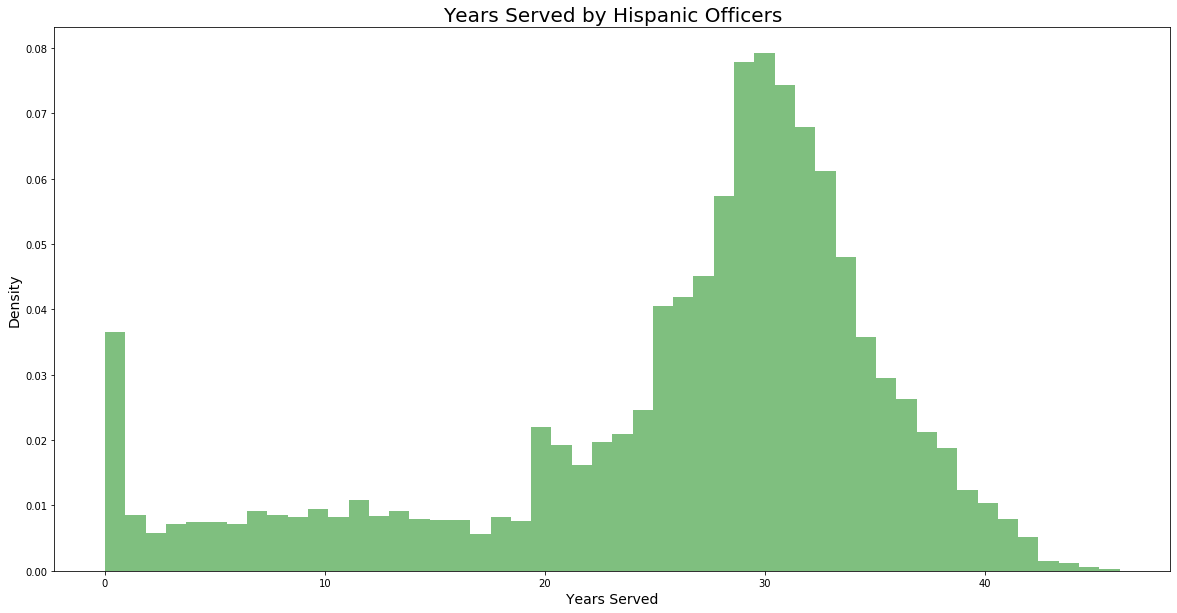

In [16]:
# Histogram of years served by Hispanic officers

print('\033[1m' + "Hispanic Officer Statistics" + "\033[0;0m")
print(hispanic_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(white_list, density = True, alpha = .5, color = 'Green', bins = 50)
plots.title("Years Served by Hispanic Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

White Officer Statistics
count    13904.000000
mean        26.227102
std          9.831511
min          0.010000
25%         23.017500
50%         29.100000
75%         32.390000
max         46.120000
dtype: float64


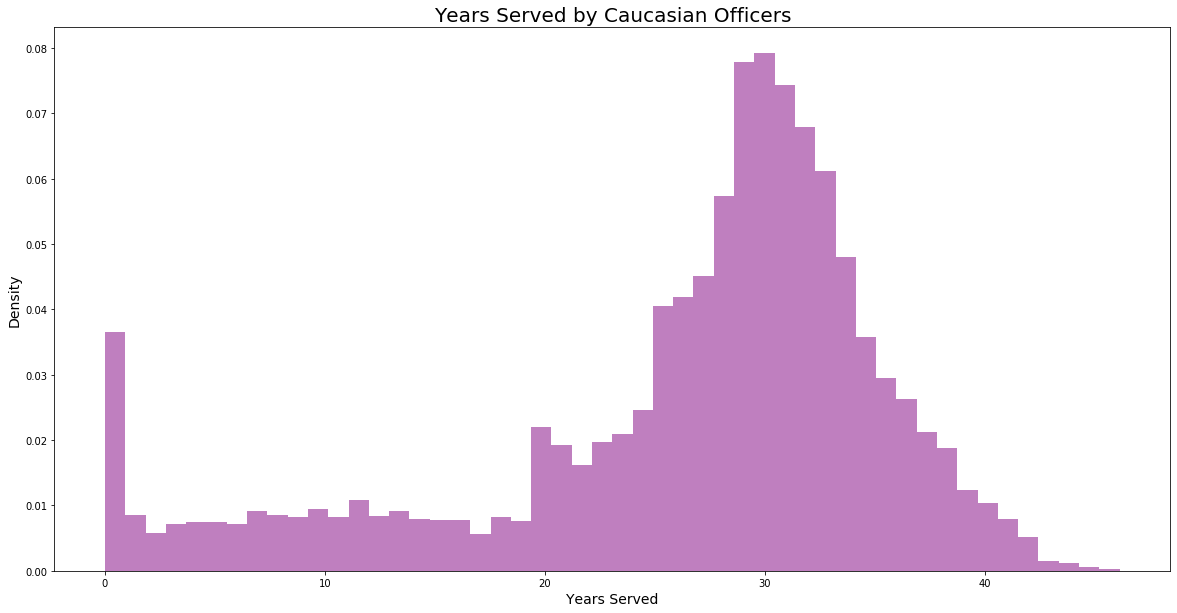

In [17]:
# Histogram of years served by Caucasian officers

print('\033[1m' + "White Officer Statistics" + "\033[0;0m")
print(white_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(white_list, density = True, alpha = .5, color = 'purple', bins = 50)
plots.title("Years Served by Caucasian Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Other Officer Statistics
count    146.000000
mean      16.141027
std       11.840126
min        0.020000
25%        4.620000
50%       18.065000
75%       27.155000
max       41.760000
dtype: float64


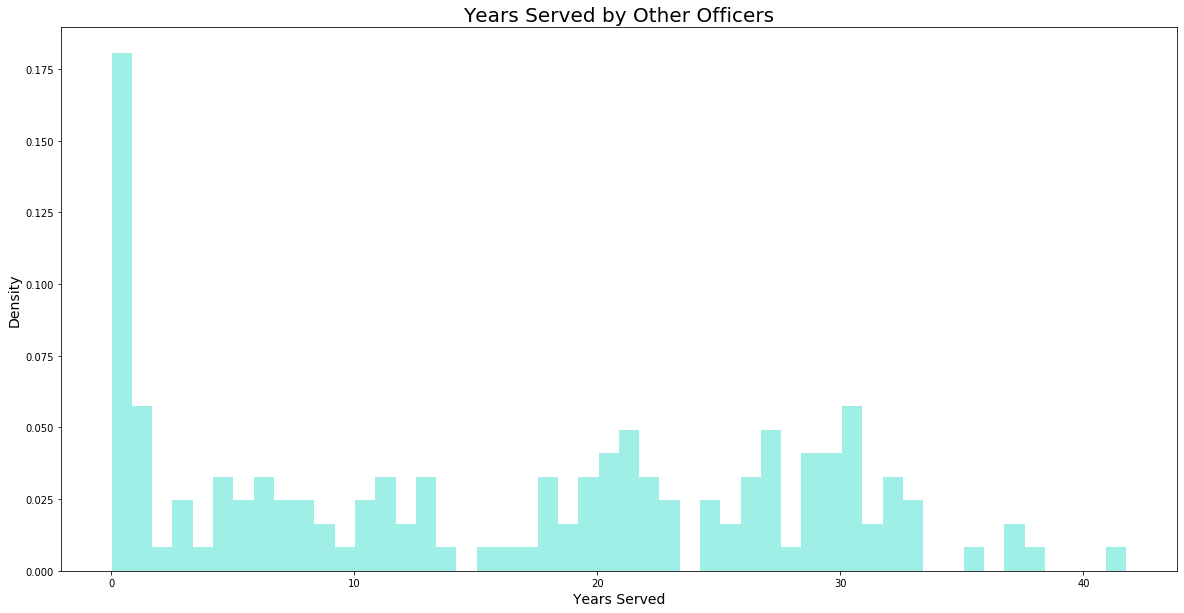

In [18]:
# Histogram of years served by nonwhite, nonblack, and nonhispanic officers

print('\033[1m' + "Other Officer Statistics" + "\033[0;0m")
print(other_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(other_list, density = True, alpha = .5, color = 'turquoise', bins = 50, label = "Other")
plots.title("Years Served by Other Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Other Officer Statistics
count    1392.000000
mean       18.282407
std        11.694627
min         0.010000
25%         6.735000
50%        21.330000
75%        28.802500
max        41.760000
dtype: float64


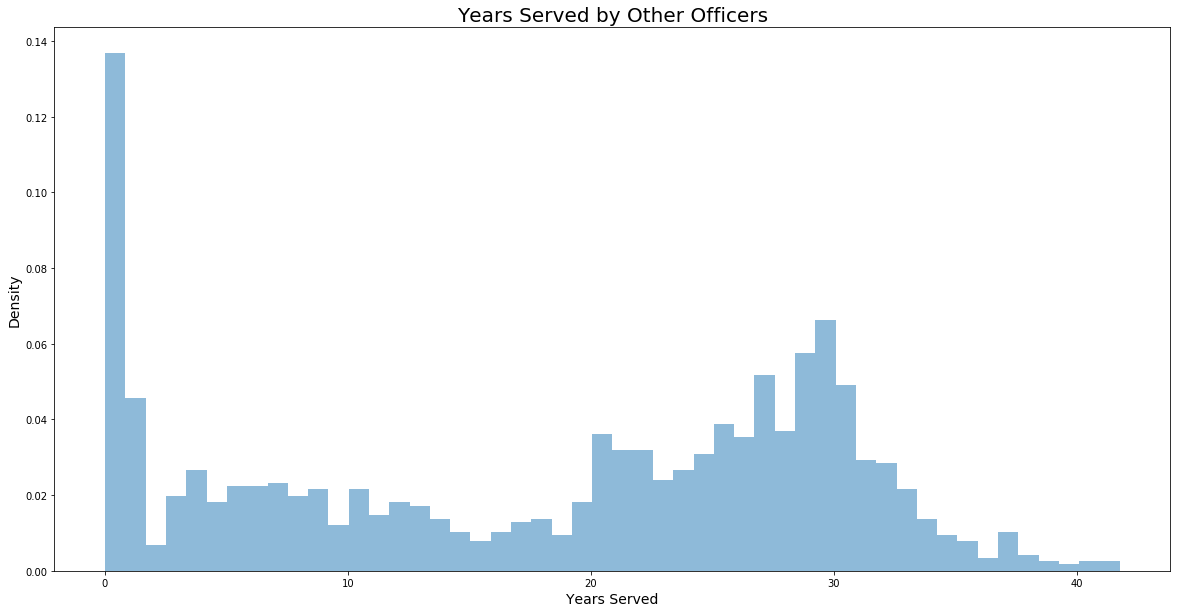

In [19]:
# Histogram of years served by Hispanic, API, and other officers

print('\033[1m' + "Other Officer Statistics" + "\033[0;0m")
print(nwob_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(n_wob, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Other")
plots.title("Years Served by Other Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

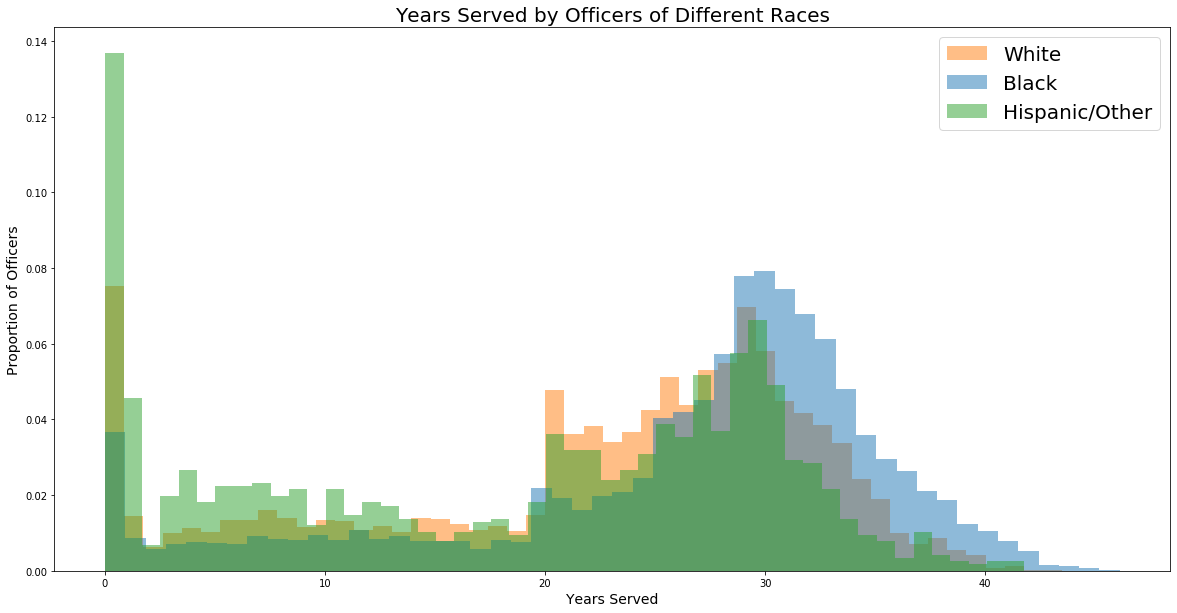

In [20]:
# Overlayed histogram of years served by officers of different races

plots.figure(figsize=(20, 10))
plots.hist(black_list, density = True, alpha = .5, color = 'tab:orange', bins = 50, label = "White")
plots.hist(white_list, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Black")
# plots.hist(white_list, density = True, alpha = .5, color = 'green', bins = 50, label = "Hispanic")
plots.hist(n_wob, density = True, alpha = .5, color = 'tab:green', bins = 50, label = "Hispanic/Other")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Years Served by Officers of Different Races", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Proportion of Officers", size = 14)
plots.savefig('overlayed.png', dpi=300, bbox_inches='tight')
plots.show()

In [21]:
# Separating officers from gender

female_officers = new_officers_cleaned.loc[new_officers_cleaned.gender == "FEMALE"]
male_officers = new_officers_cleaned.loc[new_officers_cleaned.gender == "MALE"]

female_list = female_officers.years_served.tolist()
male_list = male_officers.years_served.tolist()

female_series = pd.Series(female_list)
male_series = pd.Series(male_list)

In [22]:
len(male_officers) / len(officer_df.loc[(officer_df.gender == "MALE")])

0.623403186450409

In [23]:
len(female_officers) / len(officer_df.loc[(officer_df.gender == "FEMALE")])

0.4675549403010901

Male Officer Statistics:
count    17373.000000
mean        25.783353
std          9.995809
min          0.010000
25%         22.320000
50%         29.020000
75%         32.200000
max         46.120000
dtype: float64


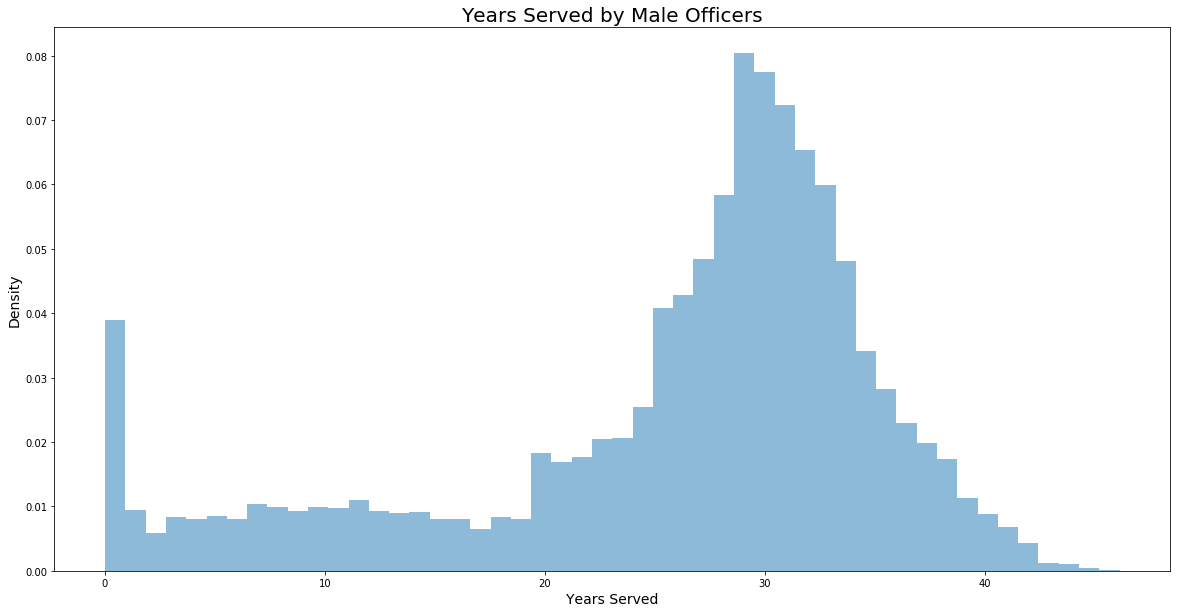

In [24]:
# Histogram of Years Served by Male Officers

print('\033[1m' + "Male Officer Statistics:" + "\033[0;0m")
print(male_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(male_list, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Male")
plots.title("Years Served by Male Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Female Officer Statistics:
count    2702.000000
mean       17.767187
std        10.276584
min         0.010000
25%         8.535000
50%        20.645000
75%        25.580000
max        40.320000
dtype: float64


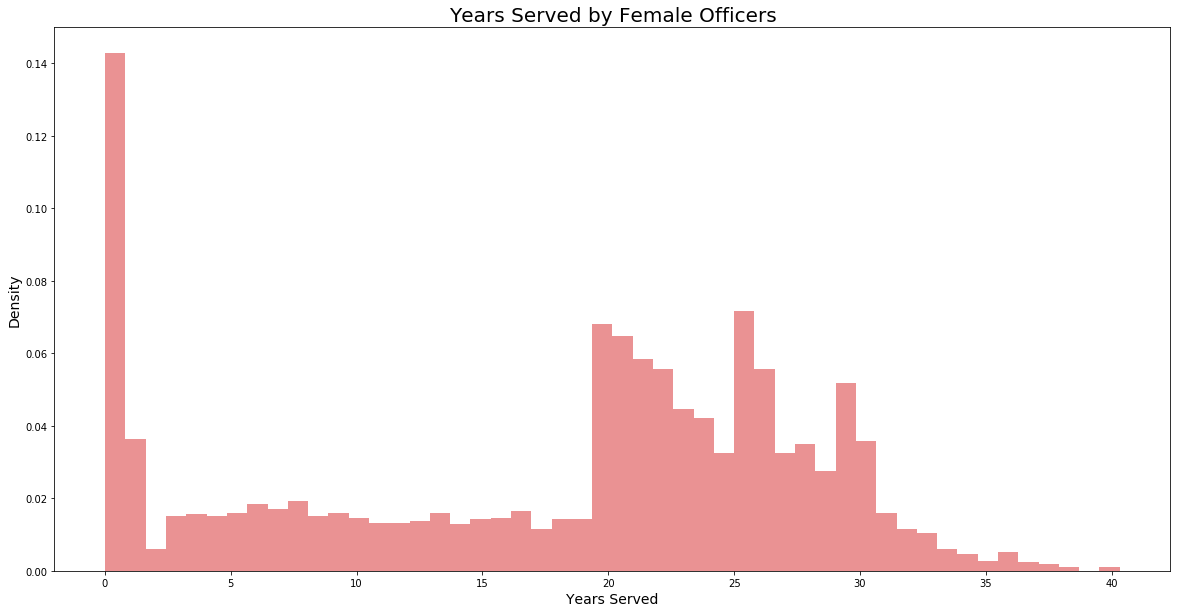

In [25]:
# Histogram of Years Served by Female Officers

print('\033[1m' + "Female Officer Statistics:" + "\033[0;0m")
print(female_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(female_list, density = True, alpha = .5, color = 'tab:red', bins = 50, label = "Female")
plots.title("Years Served by Female Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

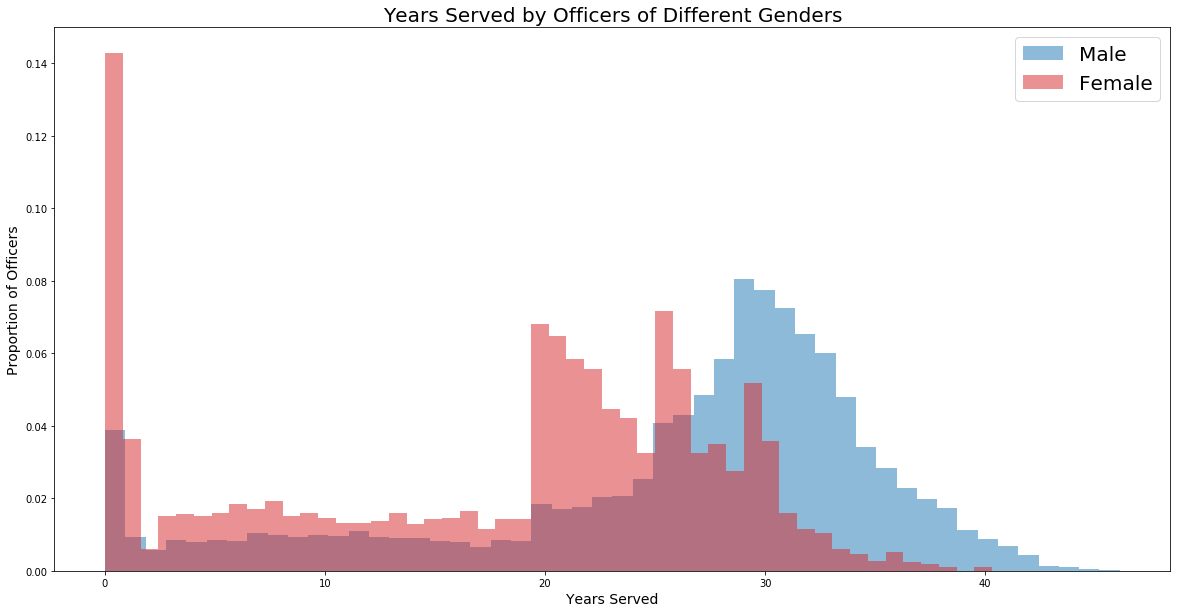

In [26]:
# Overlayed Histogram of Years Served by Officers of Different Genders

plots.figure(figsize=(20, 10))
plots.hist(male_list, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Male")
plots.hist(female_list, density = True, alpha = .5, color = 'tab:red', bins = 50, label = "Female")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Years Served by Officers of Different Genders", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Proportion of Officers", size = 14)
plots.savefig('overlayed_gender.png', dpi=300, bbox_inches='tight')
plots.show()

In [27]:
# Analyzing Complaints against officers

complaints_against_officers = pd.read_csv("../all_data/data/unified_data/complaints/complaints-accused.csv.gz", compression = 'gzip')
complaints_against_officers

/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID
0,130469.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,20040.0
1,103495.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,7727.0
2,111845.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,17149.0
3,126148.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,271.0
4,127906.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,11004.0
...,...,...,...,...,...,...,...,...,...,...
244431,117294.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080732,3,NS,NaN,NaN,NaN,29814.0
244432,107250.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,2909.0
244433,111277.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,3045.0
244434,128170.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1082535,3,UN,NaN,NaN,NaN,4550.0


In [28]:
# Function that cleans officer UID

def uid_rounder(row):
    uid = row["UID"]
    return round(uid)

In [29]:
# Applying UID cleaning function

complaints_against_officers["UID"] = complaints_against_officers.apply(uid_rounder, axis = 1)
complaints_against_officers

,UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID
0,130469,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,20040.0
1,103495,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,7727.0
2,111845,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,17149.0
3,126148,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,271.0
4,127906,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,11004.0
...,...,...,...,...,...,...,...,...,...,...
244431,117294,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080732,3,NS,NaN,NaN,NaN,29814.0
244432,107250,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,2909.0
244433,111277,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,3045.0
244434,128170,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1082535,3,UN,NaN,NaN,NaN,4550.0


In [30]:
# Merging complaints against officers with officer names using the UID

merged_complaints = complaints_against_officers.merge(profiles_df, on = "UID")
merged_complaints

,UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID_x,...,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID_y
0,130469,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,20040.0,...,1998-04-16,0.0,NaN,17.0,CAPTAIN OF POLICE,NaN,NaN,4,CAPTAIN,20040.0
1,130469,OPERATION/PERSONNEL VIOLATION: COMPENSATORY TIME,10C,C198428,1,SU,5 DAY SUSPENSION,NaN,NaN,20040.0,...,1998-04-16,0.0,NaN,17.0,CAPTAIN OF POLICE,NaN,NaN,4,CAPTAIN,20040.0
2,130469,VERBAL ABUSE - USE OF PROFANITY,01A,C210418,1,NS,NO ACTION TAKEN,NaN,NaN,20040.0,...,1998-04-16,0.0,NaN,17.0,CAPTAIN OF POLICE,NaN,NaN,4,CAPTAIN,20040.0
3,130469,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C237781,1,SU,RESIGNED -NOT SERVED,NaN,NaN,20040.0,...,1998-04-16,0.0,NaN,17.0,CAPTAIN OF POLICE,NaN,NaN,4,CAPTAIN,20040.0
4,103495,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,7727.0,...,2006-08-22,0.0,1407.0,20.0,SERGEANT OF POLICE,1982-06-14,1982-06-14,10,SERGEANT,7727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244338,133668,DOMESTIC ALTERCATION/INCIDENT - OFF DUTY,05ZZK,279398,3,NS,NaN,NaN,NaN,33678.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33678.0
244339,133670,DOMESTIC ALTERCATION/INCIDENT - OFF DUTY,05ZZK,280767,3,NS,NaN,NaN,NaN,33680.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33680.0
244340,132446,UNNECESSARY PHYSICAL CONTACT -ON DUTY,05ZZL,290537,3,NS,NaN,NaN,NaN,32448.0,...,NaN,NaN,17311.0,18.0,NaN,1985-03-04,1985-03-04,5,NaN,32448.0
244341,132446,MISCELLANEOUS,S021,1049756,3,UN,NaN,NaN,NaN,32448.0,...,NaN,NaN,17311.0,18.0,NaN,1985-03-04,1985-03-04,5,NaN,32448.0


In [31]:
# Cleaning merged dataset, removing columns

cleaned_merge_complaints = merged_complaints.loc[:, ["UID", "cr_id", "final_finding", "first_name", "last_name", "middle_initial", "race", "gender", "years_served"]]
cleaned_merge_complaints

/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,UID,cr_id,final_finding,first_name,last_name,middle_initial,race,gender,years_served
0,130469,C170981,NS,WALTER,MURPHY,J,WHITE,MALE,NaN
1,130469,C198428,SU,WALTER,MURPHY,J,WHITE,MALE,NaN
2,130469,C210418,NS,WALTER,MURPHY,J,WHITE,MALE,NaN
3,130469,C237781,SU,WALTER,MURPHY,J,WHITE,MALE,NaN
4,103495,C170981,NS,CHARLES,EBERSPACHER,J,WHITE,MALE,NaN
...,...,...,...,...,...,...,...,...,...
244338,133668,279398,NS,DEBBIE,ROBERSON,L,BLACK,FEMALE,NaN
244339,133670,280767,NS,ROBIN,BELL,L,BLACK,FEMALE,NaN
244340,132446,290537,NS,JAMES,MARTIN,K,BLACK,MALE,NaN
244341,132446,1049756,UN,JAMES,MARTIN,K,BLACK,MALE,NaN


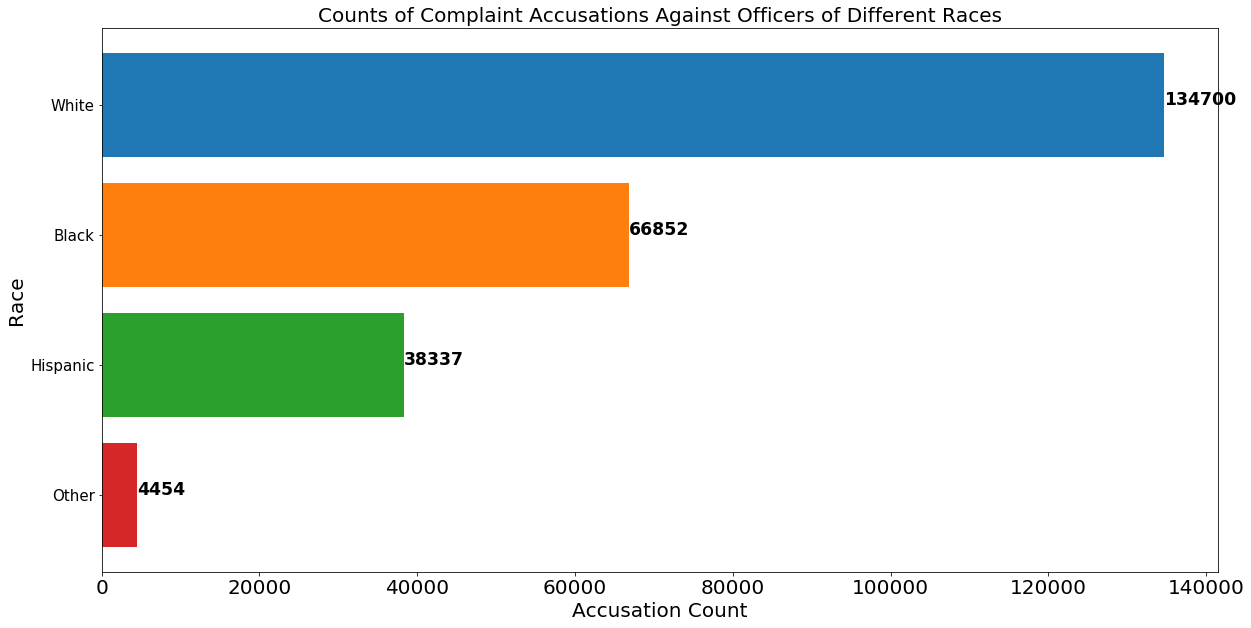

In [32]:
# Analyzing Accused Officers by Race

black_complaints = cleaned_merge_complaints.loc[cleaned_merge_complaints.race == "BLACK"]
white_complaints = cleaned_merge_complaints.loc[cleaned_merge_complaints.race == "WHITE"]
hispanic_complaints = cleaned_merge_complaints.loc[cleaned_merge_complaints.race == "HISPANIC"]
other_complaints = cleaned_merge_complaints.loc[(cleaned_merge_complaints.race != "BLACK") & (cleaned_merge_complaints.race != "HISPANIC") & (cleaned_merge_complaints.race != "WHITE")]

black_complaints_list = black_complaints.years_served.tolist()
white_complaints_list = white_complaints.years_served.tolist()
hispanic_complaints_list = hispanic_complaints.years_served.tolist()
other_complaints_list = other_complaints.years_served.tolist()

black_complaints_series = pd.Series(black_complaints_list)
white_complaints_series = pd.Series(white_complaints_list)
other_complaints_series = pd.Series(other_complaints_list)

lst3 = [len(other_complaints_list), len(hispanic_complaints_list), len(black_complaints_list), len(white_complaints_list)]

dictionary = {"Other": len(other_complaints_list), "Hispanic": len(hispanic_complaints_list),"Black": len(black_complaints_list), "White": len(white_complaints_list)}

plots.figure(figsize=(20, 10))
plots.title("Counts of Complaint Accusations Against Officers of Different Races", size = 20)
plots.barh(list(dictionary.keys()), list(dictionary.values()), color = ["tab:red", "tab:green", "tab:orange", "tab:blue"])
plots.ylabel("Race", size = 20)
plots.xlabel("Accusation Count", size = 20)

plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
for index, value in enumerate(lst3):
    plots.text(value, index, str(value), size = "xx-large", fontweight = 'bold')
    
plots.savefig('complaints_count.png', dpi=300, bbox_inches='tight')

plots.show()



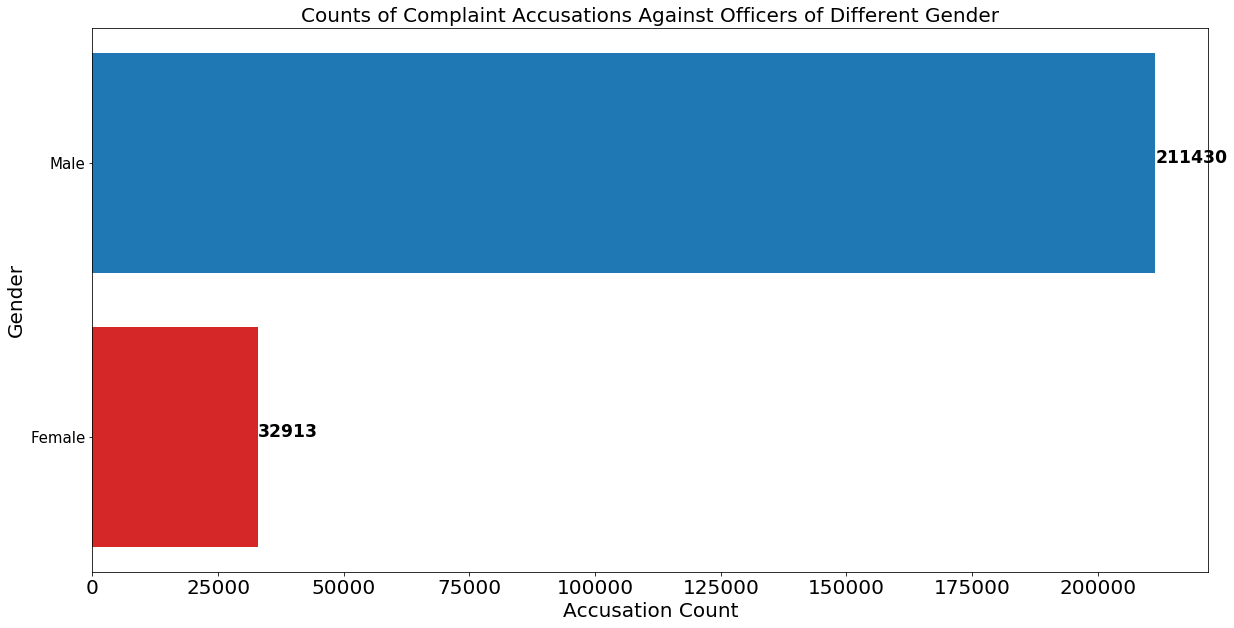

In [33]:
# Analyzing Accused Officers by Gender

female_comp = cleaned_merge_complaints.loc[cleaned_merge_complaints.gender == "FEMALE"]
male_comp = cleaned_merge_complaints.loc[cleaned_merge_complaints.gender == "MALE"]

female_comp_list = female_comp.years_served.tolist()
male_comp_list = male_comp.years_served.tolist()

f_s = pd.Series(female_comp_list)
m_s = pd.Series(male_comp_list)

lst2 = [len(female_comp_list), len(male_comp_list)]

gender_dict = {"Female": len(female_comp_list), "Male": len(male_comp_list)}

plots.figure(figsize=(20, 10))
plots.title("Counts of Complaint Accusations Against Officers of Different Gender", size = 20)
plots.barh(list(gender_dict.keys()), list(gender_dict.values()), color = ["tab:red", "tab:blue"])
plots.ylabel("Gender", size = 20)
plots.xlabel("Accusation Count", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
for index, value in enumerate(lst2):
    plots.text(value, index, str(value), size = "xx-large", fontweight = 'bold')
    
plots.savefig('complaints_g_count.png', dpi=300, bbox_inches='tight')

plots.show()

In [34]:
# Dropping repeat accusations (officers accused more than once)

dup_dropped = cleaned_merge_complaints.drop_duplicates("UID", keep="first")
dup_dropped

,UID,cr_id,final_finding,first_name,last_name,middle_initial,race,gender,years_served
0,130469,C170981,NS,WALTER,MURPHY,J,WHITE,MALE,NaN
4,103495,C170981,NS,CHARLES,EBERSPACHER,J,WHITE,MALE,NaN
15,111845,C170981,NS,JAMES,MALONEY,P,WHITE,MALE,NaN
20,126148,C170981,NS,RONALD,ALBEE,W,WHITE,MALE,NaN
38,127906,C170981,NS,STERLING,GUNN,NaN,BLACK,MALE,NaN
...,...,...,...,...,...,...,...,...,...
244337,133669,261015,NS,JOHN,MACIEJEWSKI,A,WHITE,MALE,NaN
244338,133668,279398,NS,DEBBIE,ROBERSON,L,BLACK,FEMALE,NaN
244339,133670,280767,NS,ROBIN,BELL,L,BLACK,FEMALE,NaN
244340,132446,290537,NS,JAMES,MARTIN,K,BLACK,MALE,NaN


In [35]:
# Getting lists of officers of diiferent races that have been accused (with removed multiple accusations)

white_dropped = dup_dropped.loc[dup_dropped.race == "WHITE"].years_served.tolist()
black_dropped = dup_dropped.loc[dup_dropped.race == "BLACK"].years_served.tolist()
hispanic_dropped = dup_dropped.loc[dup_dropped.race == "HISPANIC"].years_served.tolist()
other_dropped = dup_dropped.loc[(dup_dropped.race != "WHITE") & (dup_dropped.race != "BLACK") & (dup_dropped.race != "HISPANIC")].years_served.tolist()

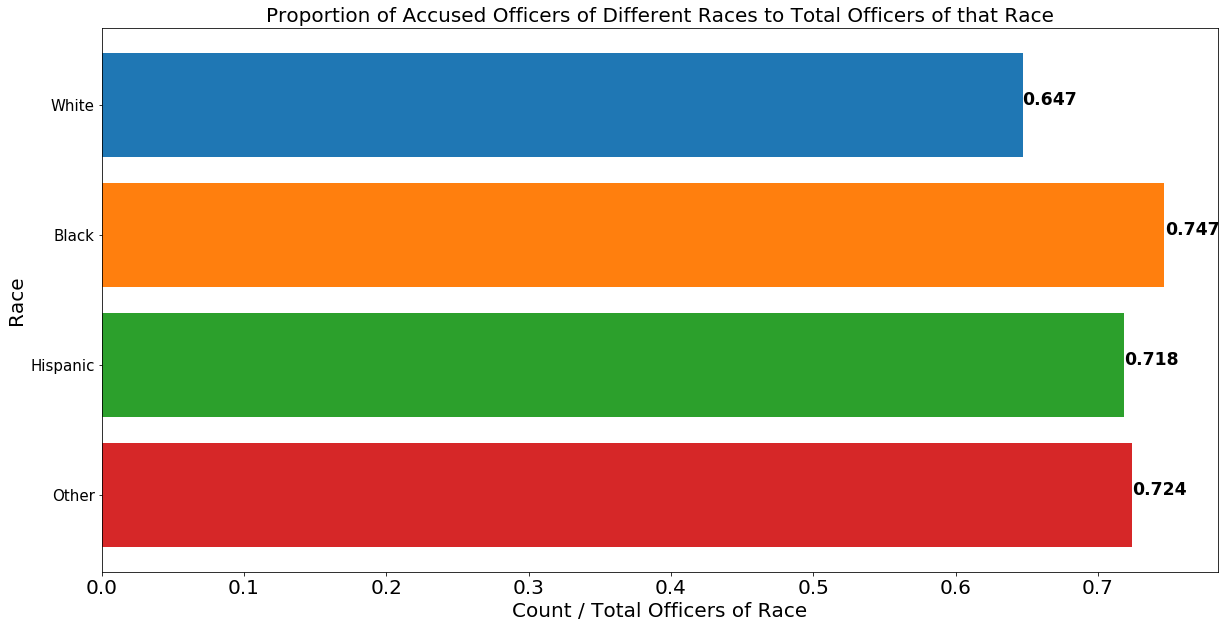

In [36]:
# Ratio of officers who have been accused vs. Total officers of that race
w_perc = float(len(white_dropped)) / float(len(real_white_list))
b_perc = float(len(black_dropped)) / float(len(real_black_list))
h_perc = float(len(hispanic_dropped)) / float(len(real_hispanic_list))
o_perc = float(len(other_dropped)) / float(len(real_other_list))

lst = [round(o_perc, 3), round(h_perc, 3), round(b_perc, 3), round(w_perc, 3),]


dictionary2 = {"Other": o_perc, "Hispanic": h_perc, "Black": b_perc, "White": w_perc,}
dictionary2

plots.figure(figsize=(20, 10))
plots.title("Proportion of Accused Officers of Different Races to Total Officers of that Race", size = 20)
plots.barh(list(dictionary2.keys()), list(dictionary2.values()), color = ["tab:red", "tab:green", "tab:orange", "tab:blue"])
plots.xlabel("Count / Total Officers of Race", size = 20)
plots.ylabel("Race", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
for index, value in enumerate(lst):
    plots.text(value, index, str(value), size = "xx-large", fontweight = 'bold')

plots.savefig('complaints_prop.png', dpi=300, bbox_inches='tight')

plots.show()

# no multiple complaints

In [38]:
# f_p

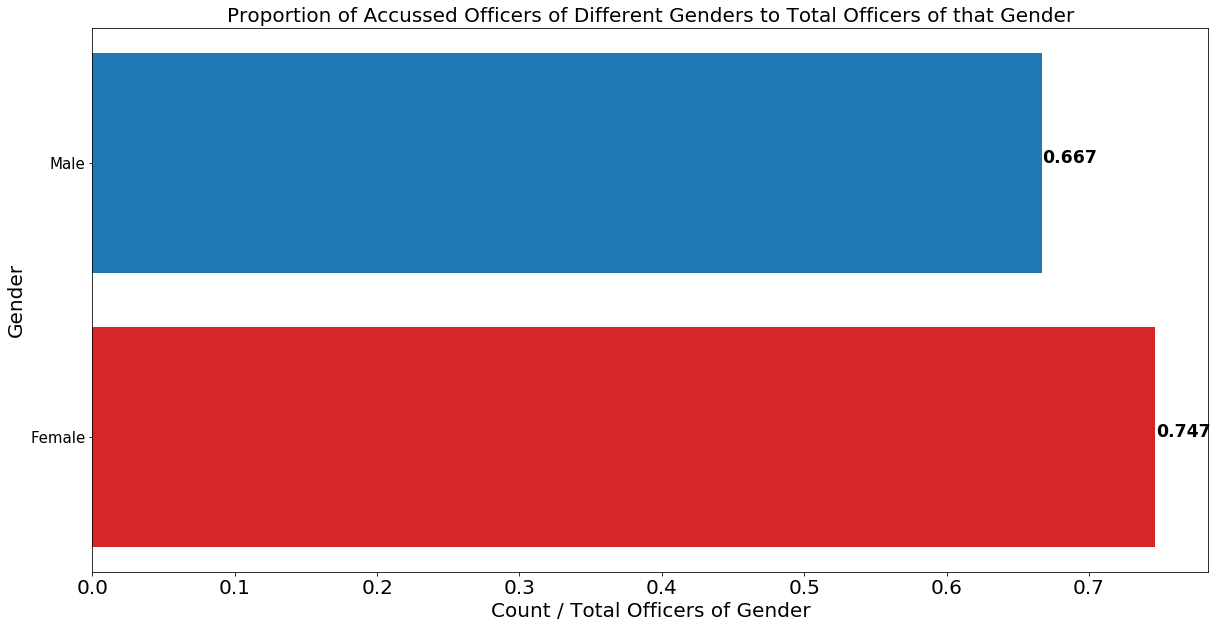

In [39]:
# Ratio of officers who have been accused vs. Total officers of that gender

female_dropped = dup_dropped.loc[dup_dropped.gender == "FEMALE"].years_served.tolist()
male_dropped = dup_dropped.loc[dup_dropped.gender == "MALE"].years_served.tolist()

f_p = len(female_dropped) / len(real_female_list)
m_p = len(male_dropped) / len(real_male_list)

lst1 = [round(f_p, 3), round(m_p, 3)]
gender_dict2 = {"Female": f_p, "Male": m_p}

plots.figure(figsize=(20, 10))
plots.title("Proportion of Accussed Officers of Different Genders to Total Officers of that Gender", size = 20)
plots.barh(list(gender_dict2.keys()), list(gender_dict2.values()), color = ["tab:red", "tab:blue"])
plots.xlabel("Count / Total Officers of Gender", size = 20)
plots.ylabel("Gender", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)

for index, value in enumerate(lst1):
    plots.text(value, index, str(value), size = "xx-large", fontweight = 'bold')
plots.savefig('complaints_prop_g.png', dpi=300, bbox_inches='tight')
plots.show()

In [40]:
len(female_dropped)
len(officer_df.loc[officer_df.gender == "FEMALE"])

5779

In [41]:
new_officers_cleaned.loc[new_officers_cleaned.gender == "FEMALE"]

,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,cleaned_rank,years_served
73,100074,ADA,MC LIN,L,BLACK,FEMALE,1991-02-27,2014-08-16,POLICE OFFICER,23.47
128,100129,ADELINA,RADUCHA,NaN,HISPANIC,FEMALE,1974-02-19,1996-04-02,DETECTIVE,22.12
149,100150,ADRIA,MHEENBEEK,T,WHITE,FEMALE,1991-12-02,2014-03-31,SERGEANT,22.33
174,100175,ADRIANE,BLACK-SLAUGHTER,D,BLACK,FEMALE,1998-04-13,2007-09-18,POLICE OFFICER,9.43
180,100181,ADRIENA,RILEY,L,BLACK,FEMALE,1991-03-27,2012-11-15,POLICE OFFICER,21.63
...,...,...,...,...,...,...,...,...,...,...
32504,132505,ALBA,MORALES,M,HISPANIC,FEMALE,2007-11-01,2011-09-07,NaN,3.85
32507,132508,SANAVIA,PICKETT,NaN,BLACK,FEMALE,2006-04-28,2011-10-18,NaN,5.47
32508,132509,KIMMERRIE,PIKOWSKI,NaN,WHITE,FEMALE,2007-11-01,2011-01-20,NaN,3.22
32510,132511,ELLEN,SCRIVNER,M,WHITE,FEMALE,2004-07-06,2007-01-31,NaN,2.57


In [42]:
dup_dropped.loc[dup_dropped.gender == "FEMALE"]

,UID,cr_id,final_finding,first_name,last_name,middle_initial,race,gender,years_served
127,101020,C182480,SU,ANDRIA,PATE,E,BLACK,FEMALE,NaN
298,103232,C182480,SU,CAROLYN,HARRIS,E,BLACK,FEMALE,NaN
517,105969,C182480,SU,DEBORAH,BROWN,E,BLACK,FEMALE,NaN
659,106866,C182480,SU,DONNA,ADAMS,M,BLACK,FEMALE,NaN
1274,110219,C182480,SU,GWENDOLYN,FLOWERS,NaN,BLACK,FEMALE,NaN
...,...,...,...,...,...,...,...,...,...
244329,117226,1087592,NaN,KRISTEN,DANIELS,T,WHITE,FEMALE,NaN
244333,117458,1087869,UN,LAURA,MACDONALD,E,WHITE,FEMALE,NaN
244335,132815,1088140,EX,TIFFANY,MABRY,S,BLACK,FEMALE,NaN
244338,133668,279398,NS,DEBBIE,ROBERSON,L,BLACK,FEMALE,NaN


In [43]:
# General Statistics for Accusations against officers of different genders and races

In [44]:
print('\033[1m' + "Caucasian Accused Officer Years Served Stats:" + "\033[0;0m")
print(white_complaints_series.describe())

Caucasian Accused Officer Years Served Stats:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


In [45]:
print('\033[1m' + "African American Accused Officer Years Served Stats:" + "\033[0;0m")
print(black_complaints_series.describe())

African American Accused Officer Years Served Stats:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


In [46]:
print('\033[1m' + "Hispanic/API Accused Officer Years Served Stats:" + "\033[0;0m")
print(other_complaints_series.describe())

Hispanic/API Accused Officer Years Served Stats:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


In [47]:
print('\033[1m' + "Female Accused Officer Years Served Stats:" + "\033[0;0m")
print(f_s.describe())

Female Accused Officer Years Served Stats:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


In [48]:
print('\033[1m' + "Male Accused Officer Years Served Stats:" + "\033[0;0m")
print(m_s.describe())

Male Accused Officer Years Served Stats:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


In [49]:
# Analyzing Victims (accusers) and merging victim gender and race with accused officer dataset by cr_id (complaint log number)

victims = pd.read_csv("../all_data/data/unified_data/complaints/complaints-victims.csv.gz", compression = 'gzip')
victims = victims.loc[:, ["cr_id", "gender", "race"]]
victims = victims.rename(columns = {"gender": "victim_gender", "race": "victim_race"})
victims = victims.loc[victims.victim_race.notnull() & victims.victim_gender.notnull()]
complaints_profiles_merged = cleaned_merge_complaints.merge(victims, on = "cr_id")
complaints_profiles_merged.to_csv("complaints_and_years_served_merged.csv")
complaints_profiles_merged


,UID,cr_id,final_finding,first_name,last_name,middle_initial,race,gender,years_served,victim_gender,victim_race
0,100527,1005434,UN,ALFONZA,WYSINGER,NaN,BLACK,MALE,NaN,MALE,WHITE
1,100527,1005434,UN,ALFONZA,WYSINGER,NaN,BLACK,MALE,NaN,MALE,WHITE
2,111051,1005434,UN,JACKIE,CAMPBELL,NaN,BLACK,FEMALE,NaN,MALE,WHITE
3,111051,1005434,UN,JACKIE,CAMPBELL,NaN,BLACK,FEMALE,NaN,MALE,WHITE
4,100843,1005434,UN,ANDRE,PARHAM,NaN,BLACK,MALE,NaN,MALE,WHITE
...,...,...,...,...,...,...,...,...,...,...,...
107836,108007,1087904,UN,ERIC,BERMUDEZ,R,HISPANIC,MALE,NaN,MALE,HISPANIC
107837,108007,1087904,UN,ERIC,BERMUDEZ,R,HISPANIC,MALE,NaN,MALE,HISPANIC
107838,127040,1078981,NaN,SANTINO,GHIOTTO,R,WHITE,MALE,NaN,MALE,BLACK
107839,132446,1049756,UN,JAMES,MARTIN,K,BLACK,MALE,NaN,FEMALE,WHITE


In [50]:
complaints_profiles_merged = complaints_profiles_merged.drop_duplicates("cr_id", keep="first")

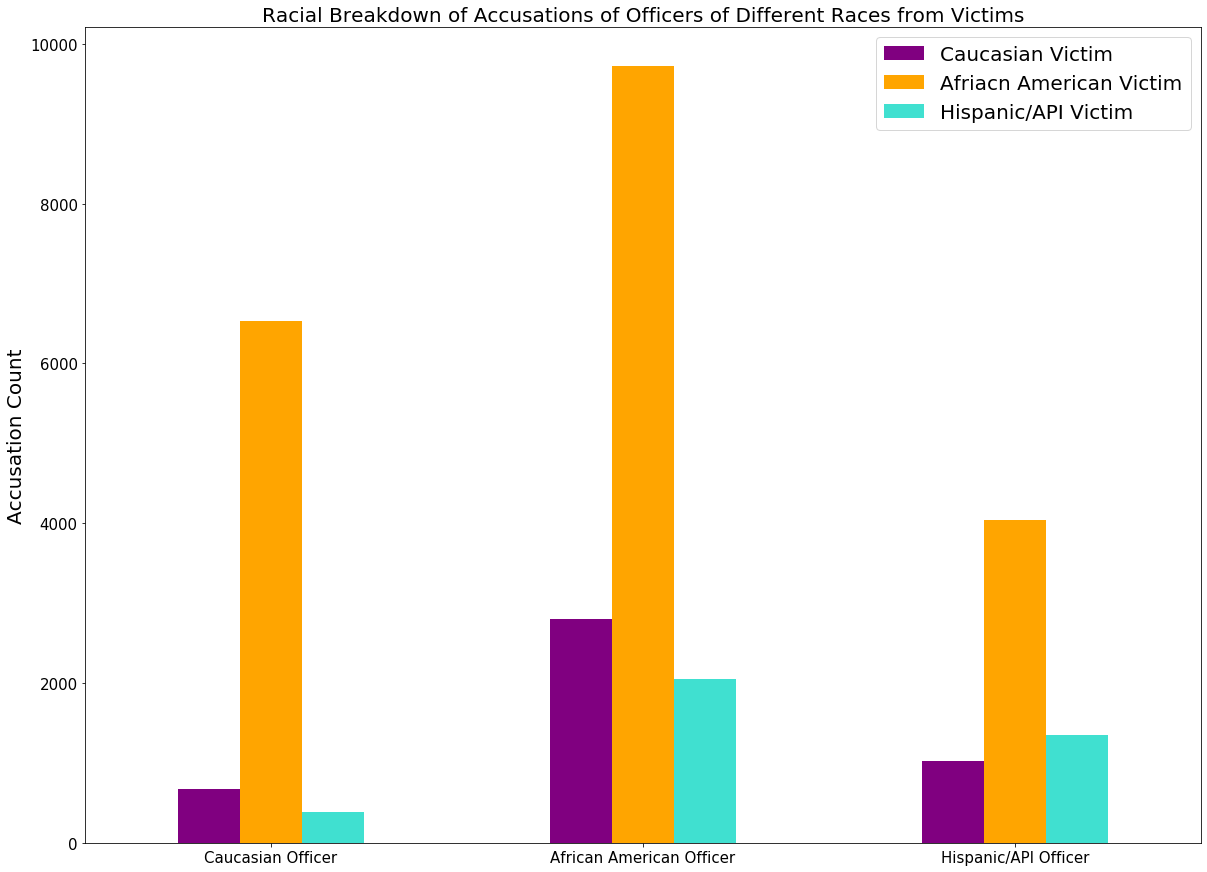

In [51]:
# Racial Breakdown of victims who accuse officers of different races

black_merged = complaints_profiles_merged.loc[complaints_profiles_merged.race == "BLACK"]
white_merged = complaints_profiles_merged.loc[complaints_profiles_merged.race == "WHITE"]
other_merged = complaints_profiles_merged.loc[(complaints_profiles_merged.race != "BLACK") & (complaints_profiles_merged.race != "WHITE")]

black_merged_list_b = black_merged.loc[black_merged.victim_race == "BLACK"]
white_merged_list_b = black_merged.loc[black_merged.victim_race == "WHITE"]
other_merged_list_b = black_merged.loc[(black_merged.victim_race != "BLACK") & (black_merged.victim_race != "WHITE")]

black_merged_list_w = white_merged.loc[white_merged.victim_race == "BLACK"]
white_merged_list_w = white_merged.loc[white_merged.victim_race == "WHITE"]
other_merged_list_w = white_merged.loc[(white_merged.victim_race != "BLACK") & (white_merged.victim_race != "WHITE")]

black_merged_list_o = other_merged.loc[other_merged.victim_race == "BLACK"]
white_merged_list_o = other_merged.loc[other_merged.victim_race == "WHITE"]
other_merged_list_o = other_merged.loc[(other_merged.victim_race != "BLACK") & (other_merged.victim_race != "WHITE")]

b_l = [len(black_merged_list_b), len(black_merged_list_w), len(black_merged_list_o)]
w_l = [len(white_merged_list_b), len(white_merged_list_w), len(white_merged_list_o)]
o_l = [len(other_merged_list_b), len(other_merged_list_w), len(other_merged_list_o)]
index = ["Caucasian Officer", "African American Officer", "Hispanic/API Officer"]

df = pd.DataFrame({'Caucasian Victim': w_l, "Afriacn American Victim": b_l, "Hispanic/API Victim": o_l}, index = index)
df.plot.bar(rot=0, figsize = (20, 15), color = ["purple", "orange", "turquoise"])
plots.title("Racial Breakdown of Accusations of Officers of Different Races from Victims", size = 20)
plots.legend(loc = "upper right", prop={'size': 20})
plots.ylabel("Accusation Count", size = 20)
plots.xticks(fontsize = 15)
plots.yticks(fontsize = 15)
plots.show()

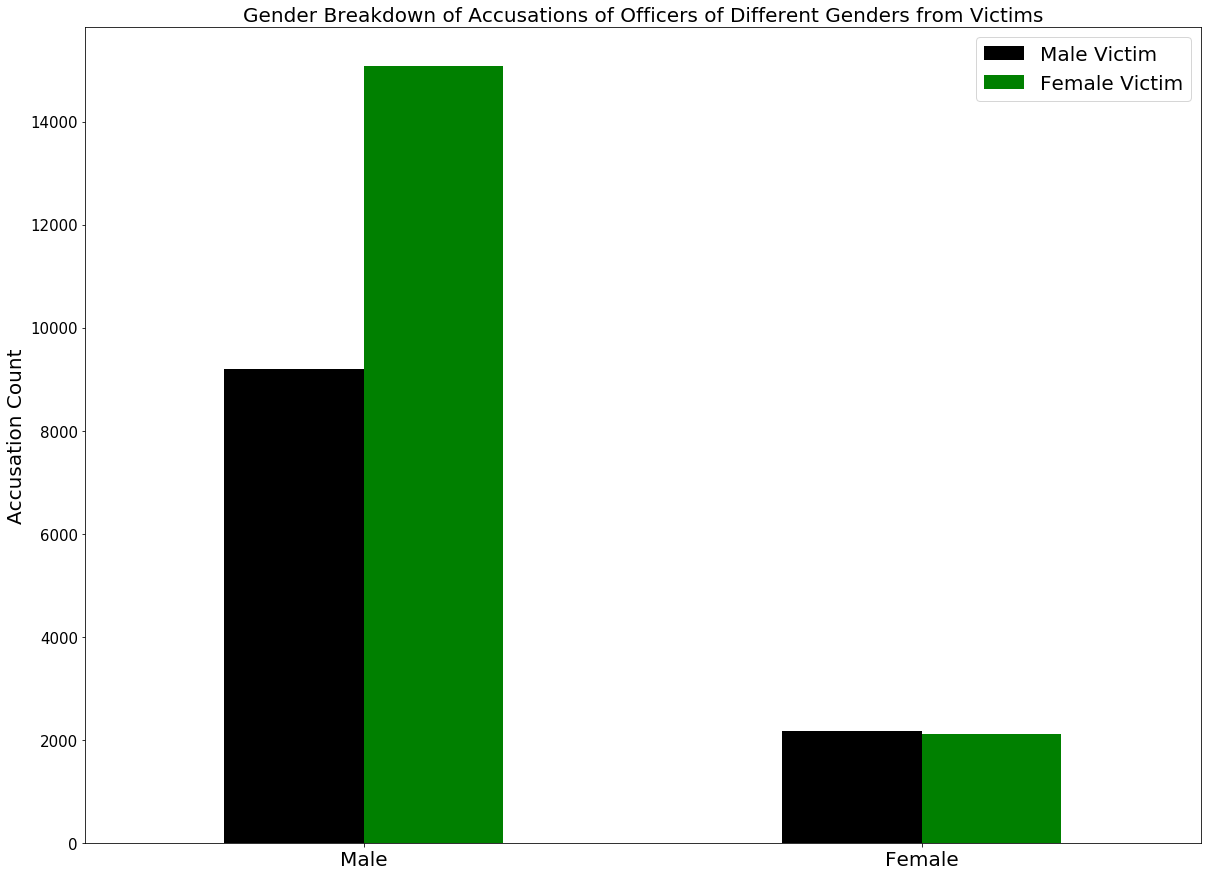

In [52]:
# Gender breakdown of victims who accuse officers of different genders

m_merged = complaints_profiles_merged.loc[complaints_profiles_merged.gender == "MALE"]
f_merged = complaints_profiles_merged.loc[complaints_profiles_merged.gender == "FEMALE"]

m_merged_m = m_merged.loc[m_merged.victim_gender == "MALE"]
f_merged_m = m_merged.loc[m_merged.victim_gender == "FEMALE"]

m_merged_f = f_merged.loc[f_merged.victim_gender == "MALE"]
f_merged_f = f_merged.loc[f_merged.victim_gender == "FEMALE"]

fem_l = [len(f_merged_m), len(f_merged_f)]
mal_l = [len(m_merged_m), len(m_merged_f)]
index1 = ["Male", "Female"]
df_g = pd.DataFrame({'Male Victim': fem_l, "Female Victim": mal_l}, index = index1)
df_g.plot.bar(rot=0, figsize = (20, 15), color = ["black", "green"])
plots.title("Gender Breakdown of Accusations of Officers of Different Genders from Victims", size = 20)
plots.legend(loc = "upper right", prop={'size': 20})
plots.ylabel("Accusation Count", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
plots.show()

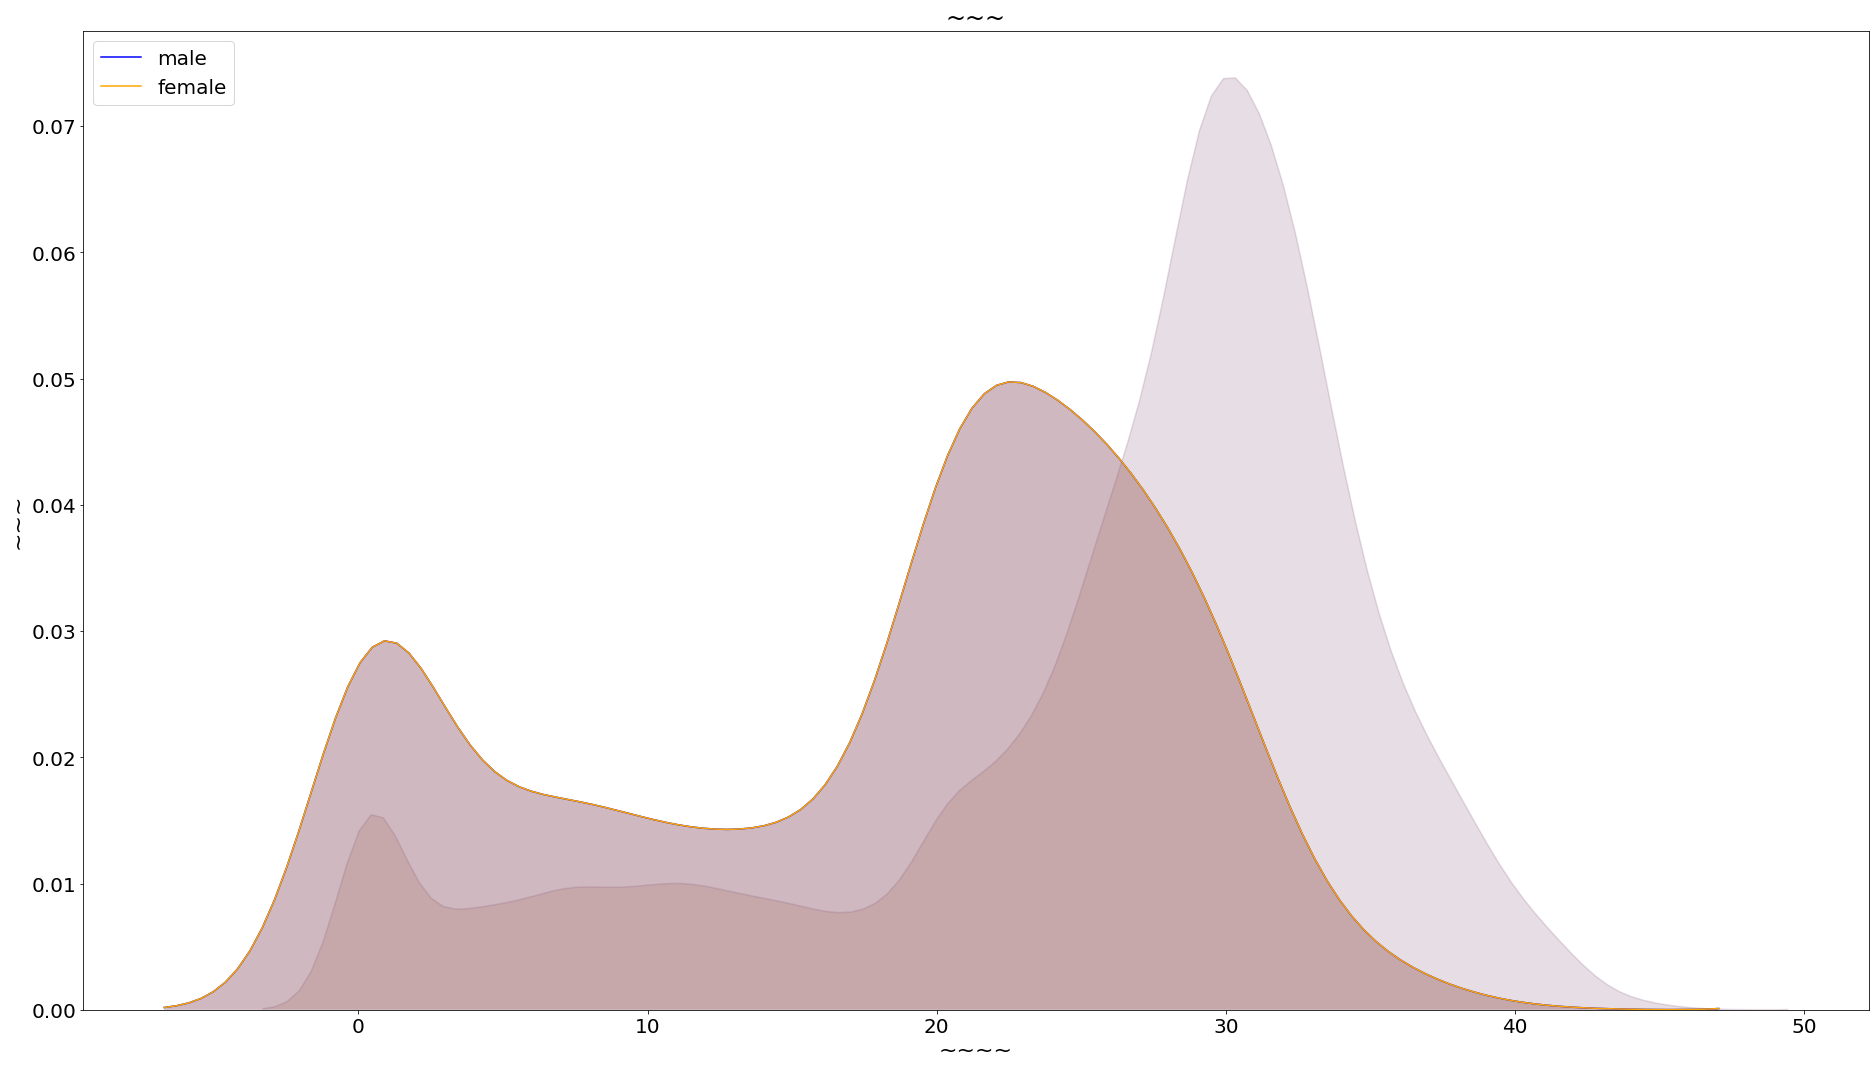

In [60]:
fig, ax = plots.subplots(figsize=(32,18))
# number of colors should be the number of histograms you'll have
colors = ['blue', 'orange']#, 'y', 'g', 'blue', 'purple', 'gray', 'black', 'pink', 'teal', 'brown'
idx = 0
for x in ['male', 'female']:
    ax = sns.kdeplot(male_list, color=colors[idx], shade=True, alpha=0.1)
    ax = sns.kdeplot(female_list, color=colors[idx], label=x, shade = True)
    idx += 1
ax.legend(fontsize=20, loc='upper left')
ax.set_title("~~~", fontsize=24)
ax.set_ylabel("~~~", fontsize=22)
ax.set_xlabel("~~~~", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)